In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [3]:
DoD = pd.read_csv('Data_Master.csv')
DoD = DoD.drop('Dates', axis=1)
DoD = DoD.drop('Date', axis=1)
DoD = DoD.drop('BTC_Price_Movement_DOD_UD', axis=1)
DoD = DoD.drop('BTC_Price_Movement_ID_UD', axis=1)
#DoD.info()

In [4]:
y = DoD['BTC_Price_Movement_DOD_10']
X = pd.get_dummies(DoD.drop(['BTC_Price_Movement_DOD_10'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((354, 24), (153, 24))

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
### Note that the line below is important. It ensures that the training data is split into
### five folds randomly. Recall what we've seen in the discussion slides that by default,
### GridSearchCV will split the training data without shuffling. 
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
### by setting random_state as a fixed number, we ensure that each time the GridSearchCV splits data, we get the 
### same split.
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

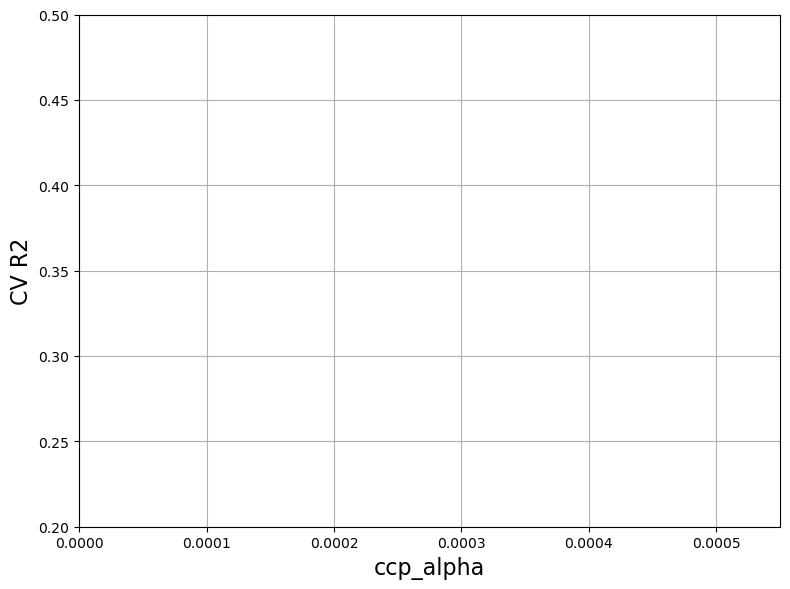

In [6]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 0.00055])
plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

In [7]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0009400000000000001}


In [8]:
print('Cross-validated R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(OSR2(dtr_cv, X_test, y_test, y_train), 5))

Cross-validated R2: -0.27018
OSR2: -0.42385


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
# Note: you can change the verbose parameter to control how much training progress is printed.
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 479 of 500
building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [10]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, X_test, y_test, y_train), 5))

OSR2: -0.01015


In [11]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,Bitcoin_Volume,5.6
1,Bitcoin_Price,4.6
2,Bitcoin_Price_Close,4.3
3,Ethereum_Price,3.6
4,Doge_Price,3.4
5,Litecoin_Price,3.4
6,SP500,3.8
7,UST_1Y_Maturity,3.8
8,UST_10Y_Maturity,3.2
9,Crude_Oil,4.8


In [12]:
import time

grid_values = {'max_features': np.linspace(1,18,18, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.8s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.6s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_e

[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.4s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=18, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
time: 81.58 s


(0.3, 0.6)

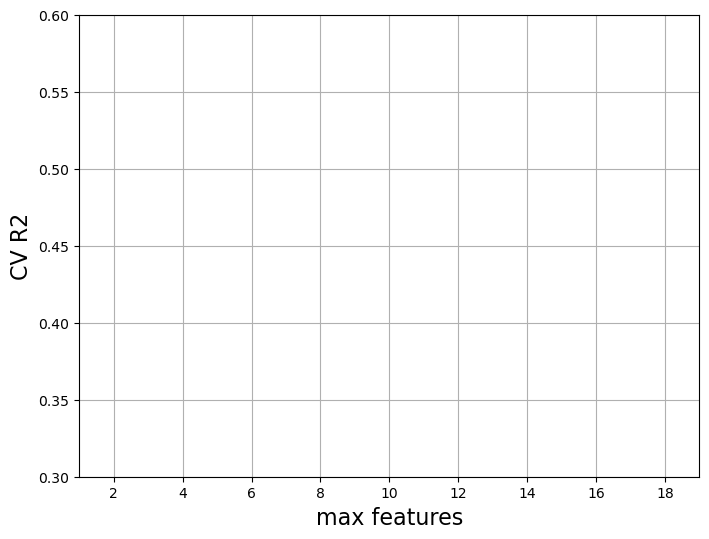

In [13]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 19])
plt.ylim([0.3, 0.6])

In [14]:
print(rf_cv.best_params_)

{'max_features': 2, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [15]:
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.02095
OSR2: 0.01321


In [16]:
pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,Bitcoin_Volume,4.7
1,Bitcoin_Price,4.3
2,Bitcoin_Price_Close,4.6
3,Ethereum_Price,4.2
4,Doge_Price,4.0
5,Litecoin_Price,3.5
6,SP500,4.1
7,UST_1Y_Maturity,4.2
8,UST_10Y_Maturity,4.0
9,Crude_Oil,4.6


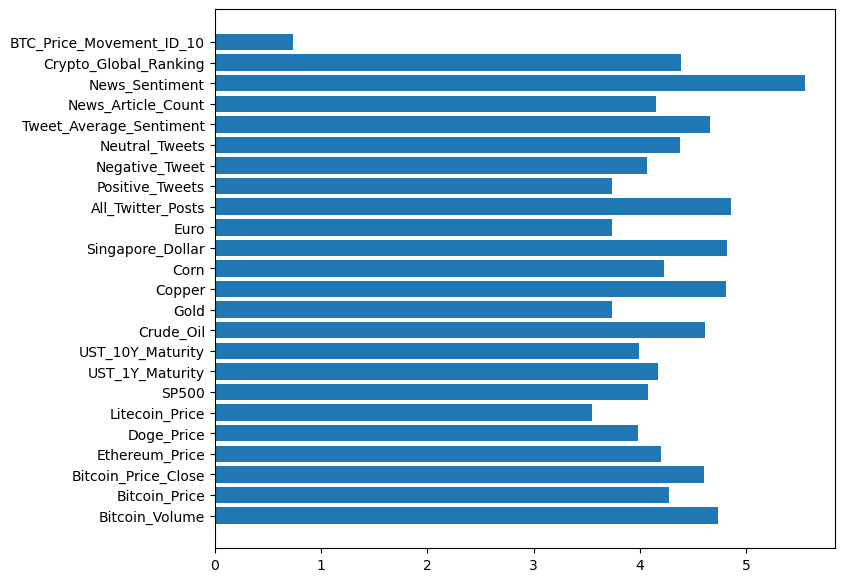

In [17]:
plt.figure(figsize=(8,7))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate= 0.001, max_leaf_nodes=3,
                                max_depth=10, min_samples_leaf=10, random_state=88, verbose=1) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2496            4.51s
         2           0.2496            4.36s
         3           0.2495            4.29s
         4           0.2495            4.26s
         5           0.2495            4.23s
         6           0.2494            4.23s
         7           0.2494            4.21s
         8           0.2494            4.21s
         9           0.2494            4.21s
        10           0.2493            4.20s
        20           0.2491            4.13s
        30           0.2488            4.09s
        40           0.2486            4.02s
        50           0.2483            3.85s
        60           0.2481            3.73s
        70           0.2478            3.60s
        80           0.2476            3.51s
        90           0.2474            3.47s
       100           0.2471            3.48s
       200           0.2448            3.44s
       300           0.2428            3.27s
       40

GradientBoostingRegressor(learning_rate=0.001, max_depth=10, max_leaf_nodes=3,
                          min_samples_leaf=10, n_estimators=2000,
                          random_state=88, verbose=1)

In [19]:
print('OSR2:', round(OSR2(gbr, X_test, y_test, y_train), 5))

OSR2: -0.00545


In [20]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True, random_state=88)
kfold_index = [] 
for index in kf.split(X_train):
    kfold_index.append(index)
# Each element of kfold_index is in the form of (kfold_index, kfold_index)

In [21]:
# Define the grid (## I am using a subset of the original grid, to reduce the running time)
n_estimators = np.linspace(500, 75*500, 75, dtype='int32')
max_leaf_nodes = np.linspace(2, 10, 9, dtype='int32') 

In [22]:
R2_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
R2_array[:]=np.nan
RMSE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
RMSE_array[:]=np.nan
MAE_array = np.zeros([len(n_estimators),len(max_leaf_nodes)])
MAE_array[:]=np.nan
print(R2_array.shape)

(75, 9)


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import time
start = time.time()
for itr in range(len(max_leaf_nodes)):
    depth = max_leaf_nodes[itr]
    print('iter % s, max_depth: %s' % (itr, depth))
    #------begin the 5-fold cross validation ------
    R2_array_cv = np.zeros([len(n_estimators),5])
    R2_array_cv[:]=np.nan
    RMSE_array_cv = np.zeros([len(n_estimators),5])
    RMSE_array_cv[:]=np.nan
    MAE_array_cv = np.zeros([len(n_estimators),5])
    MAE_array_cv[:]=np.nan
    for i in range(5):
        train_idx, val_idx = kfold_index[i]
        X_train_cv = X_train.iloc[train_idx]
        y_train_cv = y_train.iloc[train_idx]
        X_val_cv = X_train.iloc[val_idx]
        y_val_cv = y_train.iloc[val_idx]
        print('   fold-%s, training set size %s, validation set size %s' %(i, len(train_idx), len(val_idx)))
        #------ Given each training set and validation set, train a gbr model with the maximum n_estimators
        gbr2 = GradientBoostingRegressor(n_estimators = n_estimators[-1], learning_rate = 0.005, max_depth = 20,
                                         max_leaf_nodes=depth, min_samples_leaf=10,random_state=99,verbose=0)
        gbr2.fit(X_train_cv,y_train_cv)
        j=0
        idx=[]
        r2_lst=[]
        rmse_lst=[]
        mae_lst=[]
        for y_staged_pred in gbr2.staged_predict(X_val_cv):
            r2= pearsonr(y_staged_pred, y_val_cv)[0] ** 2
            rmse = mean_squared_error(y_val_cv, y_staged_pred, squared=False)
            mae = mean_absolute_error(y_val_cv, y_staged_pred)
            if j % 500 == 0:
                idx.append(j)
                r2_lst.append(r2)
                rmse_lst.append(rmse)
                mae_lst.append(mae)
            j+=1
        R2_array_cv[:,i]=r2_lst
        RMSE_array_cv[:,i]=rmse_lst
        MAE_array_cv[:,i]=mae_lst
        print('        cv fold-%s, time-ellapsed: %.2f' %(i,time.time()-start))
    R2_array[:,itr]=np.average(R2_array_cv,axis = 1)
    RMSE_array[:,itr]=np.average(RMSE_array_cv,axis = 1)
    MAE_array[:,itr]=np.average(MAE_array_cv,axis = 1)

iter 0, max_depth: 2
   fold-0, training set size 283, validation set size 71
        cv fold-0, time-ellapsed: 110.83
   fold-1, training set size 283, validation set size 71
        cv fold-1, time-ellapsed: 213.18
   fold-2, training set size 283, validation set size 71
        cv fold-2, time-ellapsed: 322.48
   fold-3, training set size 283, validation set size 71
        cv fold-3, time-ellapsed: 429.51
   fold-4, training set size 284, validation set size 70
        cv fold-4, time-ellapsed: 533.24
iter 1, max_depth: 3
   fold-0, training set size 283, validation set size 71
        cv fold-0, time-ellapsed: 645.58
   fold-1, training set size 283, validation set size 71
        cv fold-1, time-ellapsed: 756.64
   fold-2, training set size 283, validation set size 71
        cv fold-2, time-ellapsed: 867.86
   fold-3, training set size 283, validation set size 71
        cv fold-3, time-ellapsed: 978.02
   fold-4, training set size 284, validation set size 70
        cv fold-4, 

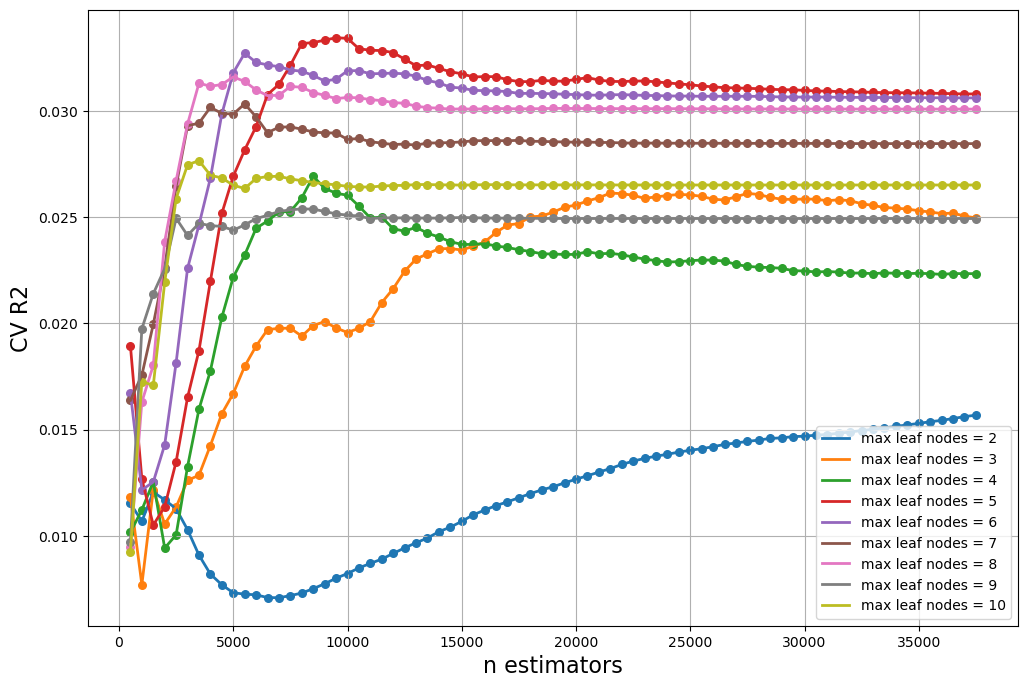

In [24]:
plt.figure(figsize=(12, 8))
plt.xlabel('n estimators', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.grid(True, which='both')

N = len(max_leaf_nodes)
M = len(n_estimators)
for i in range(N):
    plt.scatter(n_estimators, R2_array[:,i], s=30)
    plt.plot(n_estimators, R2_array[:,i], linewidth=2,
             label='max leaf nodes = '+str(max_leaf_nodes[i]))
plt.legend(loc='lower right')
plt.show()

In [25]:
best_model_index = np.argmax(R2_array)
row_index = best_model_index//R2_array.shape[1]
col_index = best_model_index % R2_array.shape[1]
best_n_estimators = n_estimators[row_index]
best_max_leaf_nodes = max_leaf_nodes[col_index]
print('Best Model: n_estimator = %s, max_leaf_nodes = %s' %(best_n_estimators, best_max_leaf_nodes))

Best Model: n_estimator = 9500, max_leaf_nodes = 5


In [26]:
gbr_cv = GradientBoostingRegressor(n_estimators = best_n_estimators, learning_rate = 0.005, max_depth = 20,
                                max_leaf_nodes=best_max_leaf_nodes, min_samples_leaf=10,random_state=99,verbose=0)
gbr_cv.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.005, max_depth=20, max_leaf_nodes=5,
                          min_samples_leaf=10, n_estimators=9500,
                          random_state=99)

In [27]:
print('Cross-validated R2:', round(R2_array[row_index, col_index], 5))
print('OSR2:', round(OSR2(gbr_cv, X_test, y_test, y_train), 5))

Cross-validated R2: 0.03344
OSR2: -0.1603


In [28]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*gbr_cv.feature_importances_}).round(1)

,Feature,Importance score
0,Bitcoin_Volume,9.1
1,Bitcoin_Price,4.9
2,Bitcoin_Price_Close,6.0
3,Ethereum_Price,1.8
4,Doge_Price,2.0
5,Litecoin_Price,3.1
6,SP500,3.1
7,UST_1Y_Maturity,3.1
8,UST_10Y_Maturity,3.0
9,Crude_Oil,4.6


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [31]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(OSR2(lr, X_test, y_test, y_train)),
                                         '{:.4f}'.format(mean_squared_error(y_test, lr.predict(X_test))),
                                         '{:.3f}'.format(mean_absolute_error(y_test, lr.predict(X_test)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(OSR2(dtr_cv, X_test, y_test, y_train)),
                                               '{:.4f}'.format(mean_squared_error(y_test, dtr_cv.predict(X_test))),
                                               '{:.3f}'.format(mean_absolute_error(y_test, dtr_cv.predict(X_test)))],
                   'Random Forest': ['{:.3f}'.format(OSR2(rf_cv, X_test, y_test, y_train)),
                                     '{:.4f}'.format(mean_squared_error(y_test, rf_cv.predict(X_test))),
                                     '{:.3f}'.format(mean_absolute_error(y_test, rf_cv.predict(X_test)))], 
                   'Gradient Boosted Trees': ['{:.3f}'.format(OSR2(gbr_cv, X_test, y_test, y_train)),
                                              '{:.4f}'.format(mean_squared_error(y_test, gbr_cv.predict(X_test))),
                                              '{:.3f}'.format(mean_absolute_error(y_test, gbr_cv.predict(X_test)))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample MSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Linear Regression,Decision Tree Regressor,Random Forest,Gradient Boosted Trees
OSR2,-0.151,-0.424,0.013,-0.160
Out-of-sample MSE,0.2883,0.3567,0.2472,0.2907
Out-of-sample MAE,0.497,0.487,0.485,0.475


In [32]:
y_test_above = y_test[y_test >0.1]
X_test_above = X_test[y_test >0.1]

y_test_below = y_test[y_test <=0.1]
X_test_below = X_test[y_test <=0.1]

MAE_rf_above = mean_absolute_error(y_test_above, rf_cv.predict(X_test_above))
MAE_rf_below = mean_absolute_error(y_test_below, rf_cv.predict(X_test_below))

MAE_gbr_above = mean_absolute_error(y_test_above, gbr_cv.predict(X_test_above))
MAE_gbr_below = mean_absolute_error(y_test_below, gbr_cv.predict(X_test_below))

In [34]:
print('Random Forest Out-of-sample MAE for day on day change above 10%:', round(MAE_rf_above, 3))
print('Random Forest Out-of-sample MAE for day on day change below 10%:', round(MAE_rf_below, 3))

print('\nGradient Boosted Trees Out-of-sample MAE for day on day change above 10%:', round(MAE_gbr_above, 3))
print('Gradient Boosted Trees Out-of-sample MAE for day on day change below 10%:', round(MAE_gbr_below, 3))

Random Forest Out-of-sample MAE for day on day change above 10%: 0.495
Random Forest Out-of-sample MAE for day on day change below 10%: 0.475

Gradient Boosted Trees Out-of-sample MAE for day on day change above 10%: 0.511
Gradient Boosted Trees Out-of-sample MAE for day on day change below 10%: 0.438
